# Comparison: Numerov - Model Potentials - Whittaker 

In [ ]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from ryd_numerov import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")

## Wavefunction

In [2]:
states: dict[str, RydbergState] = {}

In [3]:
state = RydbergState("Rb", n=10, l=0, j=0.5)

state.create_model_potential(add_model_potentials=True)
state.create_wavefunction()
states["Numerov with Model Potentials"] = state

state_without_mp = RydbergState(state.species, state.n, state.l, state.j)
state_without_mp.create_model_potential(add_model_potentials=False)
state_without_mp.create_wavefunction()
states["Numerov without Model Potentials"] = state_without_mp

WARNING wavefunction.py: The wavefunction (species=Rb n=10, l=0, j=0.5) has some issues:
      The maximum of the wavefunction is close to the inner boundary (idmax=0) probably due to inner divergence of the wavefunction. 
      The wavefunction is negative at the inner boundary (-0.0742657610724855).
      The wavefunction has 6.0 nodes, but should have 9 nodes.


In [4]:
state_whittaker = RydbergState(state.species, state.n, state.l, state.j)
state_whittaker.create_grid(x_min=state.grid.x_min, x_max=state.grid.x_max)
state_whittaker.create_wavefunction_whittaker()
states["Whittaker"] = state_whittaker

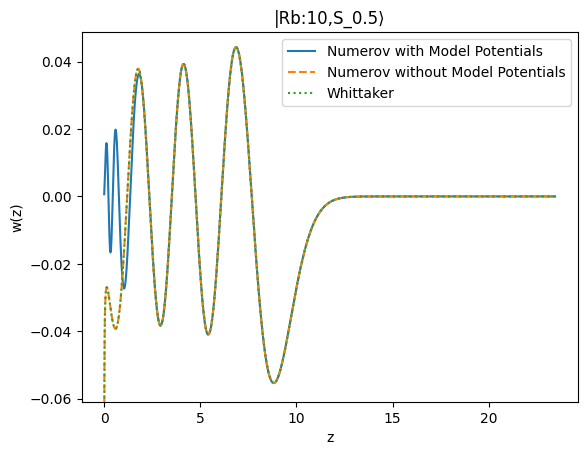

In [ ]:
fig, ax = plt.subplots()
ax.set_title(str(state))

styles = ["-", "--", ":"]
for i, (label, _state) in enumerate(states.items()):
    ax.plot(_state.grid.z_list, _state.wavefunction.w_list, ls=styles[i], label=label)
ax.legend()

ax.set_xlabel("z")
ax.set_ylabel("w(z)")

ax.set_ylim(1.1 * np.min(state.wavefunction.w_list), 1.1 * np.max(state.wavefunction.w_list))

plt.show()

## Radial matrix elements

In [ ]:
state1 = RydbergState("Rb", n=10, l=0, j=0.5)
state2 = RydbergState("Rb", n=9, l=1, j=1.5)

dipole_me = state1.calc_radial_matrix_element(state2, 1)
print(f"Numerov with model potentials: {dipole_me}")

_state1 = RydbergState(state1.species, state1.n, state1.l, state1.j)
_state1.create_model_potential(add_model_potentials=False)
_state2 = RydbergState(state2.species, state2.n, state2.l, state2.j)
_state2.create_model_potential(add_model_potentials=False)

dipole_me = _state1.calc_radial_matrix_element(_state2, 1)
print(f"Numerov without model potentials: {dipole_me}")

_state1 = RydbergState(state1.species, state1.n, state1.l, state1.j)
_state1.create_grid(x_min=state1.grid.x_min, x_max=state1.grid.x_max)
_state1.create_wavefunction_whittaker()
_state2 = RydbergState(state2.species, state2.n, state2.l, state2.j)
_state2.create_grid(x_min=state1.grid.x_min, x_max=state1.grid.x_max)
_state2.create_wavefunction_whittaker()

dipole_me = _state1.calc_radial_matrix_element(_state2, 1)
print(f"Whittaker: {dipole_me}")

WARNING wavefunction.py: The wavefunction (species=Rb n=10, l=0, j=0.5) has some issues:
      The maximum of the wavefunction is close to the inner boundary (idmax=0) probably due to inner divergence of the wavefunction. 
      The wavefunction is negative at the inner boundary (-0.0742657610724855).
      The wavefunction has 6.0 nodes, but should have 9 nodes.
WARNING wavefunction.py: The wavefunction (species=Rb n=9, l=1, j=1.5) has some issues:
      Wavefunction diverges at the inner boundary, w_abs_max / outer_max=7.03e+04
      Trying to correct the wavefunction.
      The wavefunction is not close to zero at the inner boundary (inner_weight_scaled_to_whole_grid=8.63e-02)
      The wavefunction has 5.0 nodes, but should have 7 nodes.


Numerov with model potentials: 43.63981834593477 bohr
Numerov without model potentials: 43.58422150123332 bohr
Whittaker: 43.560121165245334 bohr
